In [30]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [31]:
import os
os.chdir('/content/drive/My Drive/ML_Models/DecisionTrees')
!pwd

/content/drive/My Drive/ML_Models/DecisionTrees


In [32]:
from matplotlib import pyplot as plt
from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier 
from sklearn import tree

In [33]:
# Prepare the data data
iris = datasets.load_iris()
X = iris.data
y = iris.target

In [34]:
# Fit the classifier with default hyper-parameters
clf = DecisionTreeClassifier(random_state=1234)
model = clf.fit(X, y)

In [35]:
text_representation = tree.export_text(clf)
print(text_representation)

|--- feature_2 <= 2.45
|   |--- class: 0
|--- feature_2 >  2.45
|   |--- feature_3 <= 1.75
|   |   |--- feature_2 <= 4.95
|   |   |   |--- feature_3 <= 1.65
|   |   |   |   |--- class: 1
|   |   |   |--- feature_3 >  1.65
|   |   |   |   |--- class: 2
|   |   |--- feature_2 >  4.95
|   |   |   |--- feature_3 <= 1.55
|   |   |   |   |--- class: 2
|   |   |   |--- feature_3 >  1.55
|   |   |   |   |--- feature_0 <= 6.95
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- feature_0 >  6.95
|   |   |   |   |   |--- class: 2
|   |--- feature_3 >  1.75
|   |   |--- feature_2 <= 4.85
|   |   |   |--- feature_1 <= 3.10
|   |   |   |   |--- class: 2
|   |   |   |--- feature_1 >  3.10
|   |   |   |   |--- class: 1
|   |   |--- feature_2 >  4.85
|   |   |   |--- class: 2



In [36]:
#saving it to file
with open("decistion_tree.log", "w") as fout:
    fout.write(text_representation)

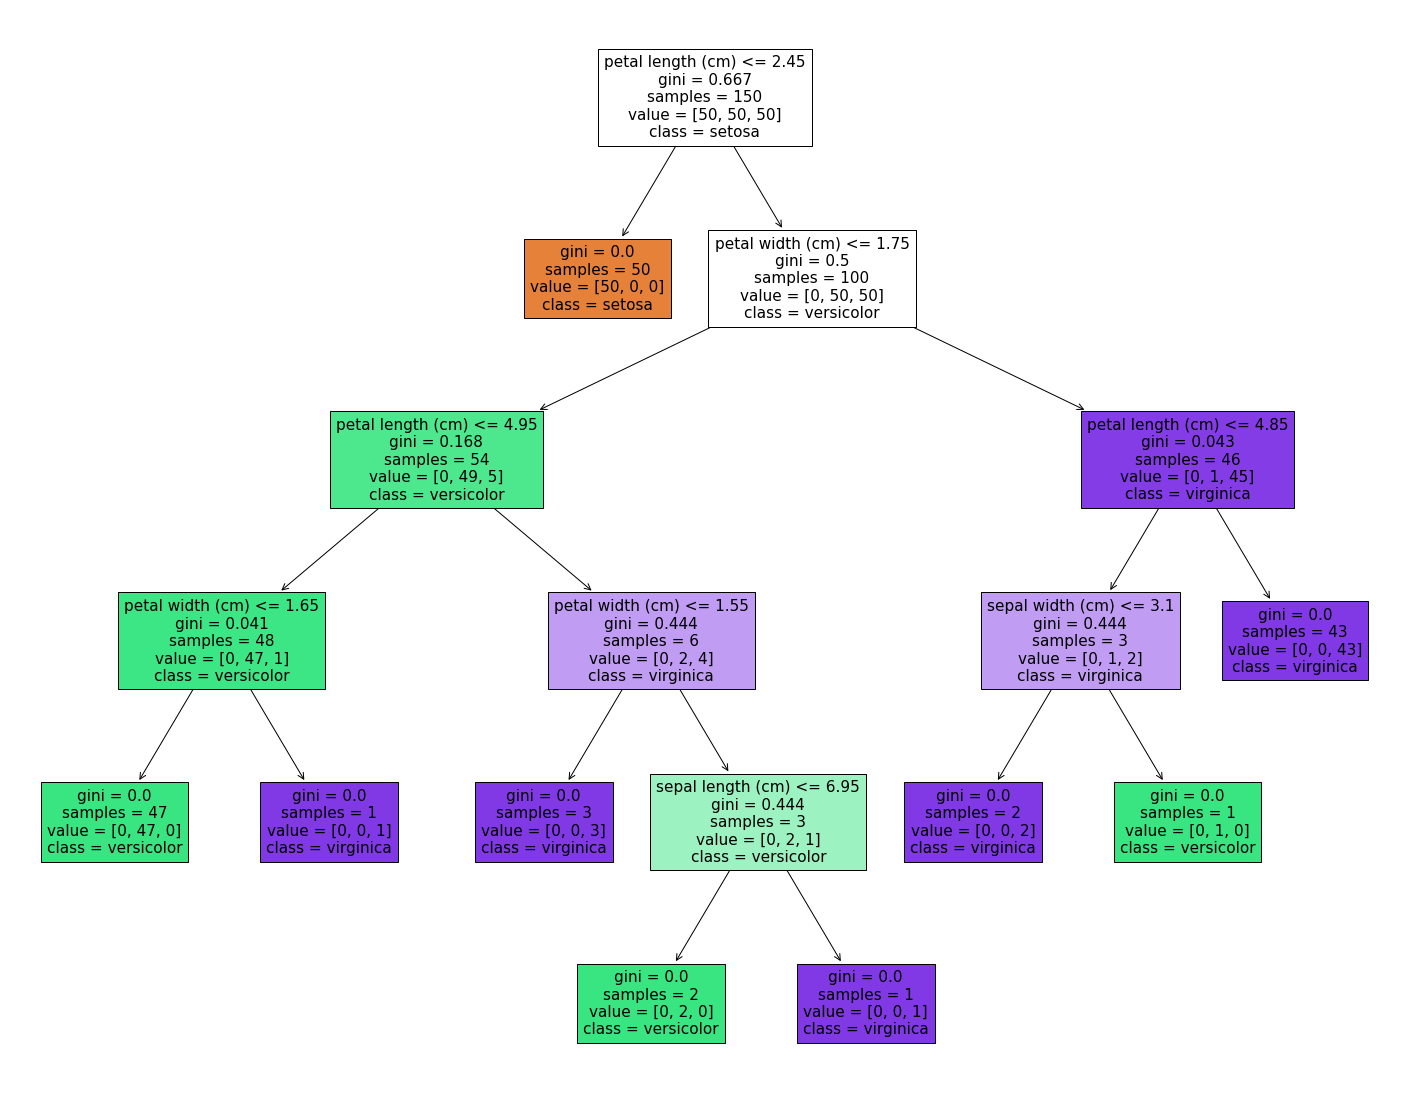

In [37]:
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(clf, 
                   feature_names=iris.feature_names,  
                   class_names=iris.target_names,
                   filled=True)

In [38]:
fig.savefig("decistion_tree.png")

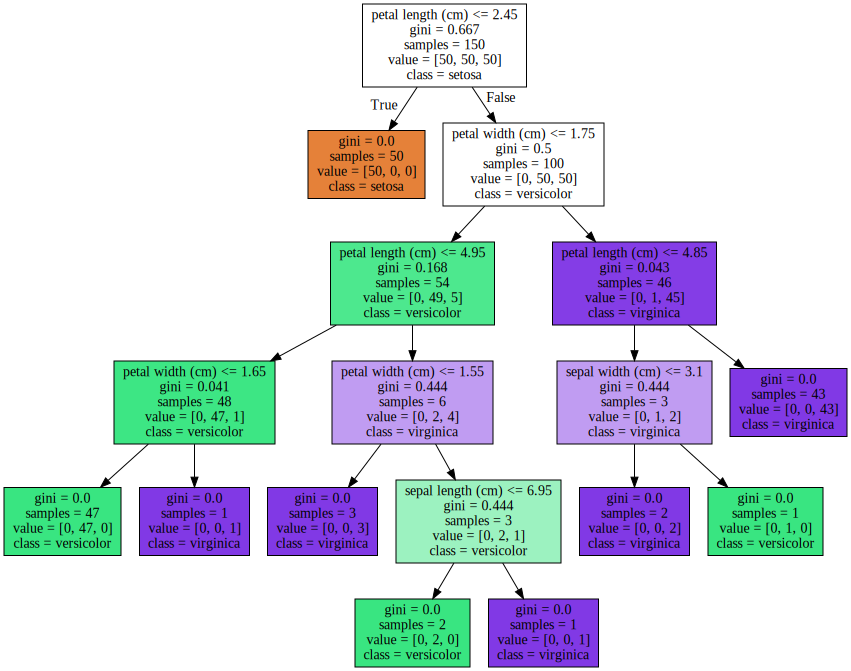

In [39]:
import graphviz
# DOT data
dot_data = tree.export_graphviz(clf, out_file=None, 
                                feature_names=iris.feature_names,  
                                class_names=iris.target_names,
                                filled=True)

# Draw graph
graph = graphviz.Source(dot_data, format="png") 
graph

In [40]:
graph.render("decision_tree_graphivz")

'decision_tree_graphivz.png'

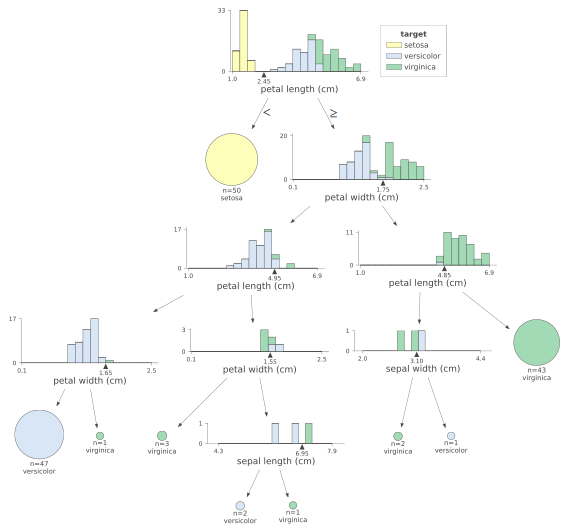

In [41]:
!pip install dtreeviz
from dtreeviz.trees import dtreeviz # remember to load the package

viz = dtreeviz(clf, X, y,
                target_name="target",
                feature_names=iris.feature_names,
                class_names=list(iris.target_names))

viz

In [42]:
viz.save("decision_tree.svg")

In [43]:
from sklearn import datasets
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree

In [44]:
# Prepare the data data
boston = datasets.load_boston()
X = boston.data
y = boston.target

In [45]:
# Fit the regressor, set max_depth = 3
regr = DecisionTreeRegressor(max_depth=3, random_state=1234)
model = regr.fit(X, y)

In [46]:
text_representation = tree.export_text(regr)
print(text_representation)

|--- feature_5 <= 6.94
|   |--- feature_12 <= 14.40
|   |   |--- feature_7 <= 1.38
|   |   |   |--- value: [45.58]
|   |   |--- feature_7 >  1.38
|   |   |   |--- value: [22.91]
|   |--- feature_12 >  14.40
|   |   |--- feature_0 <= 6.99
|   |   |   |--- value: [17.14]
|   |   |--- feature_0 >  6.99
|   |   |   |--- value: [11.98]
|--- feature_5 >  6.94
|   |--- feature_5 <= 7.44
|   |   |--- feature_4 <= 0.66
|   |   |   |--- value: [33.35]
|   |   |--- feature_4 >  0.66
|   |   |   |--- value: [14.40]
|   |--- feature_5 >  7.44
|   |   |--- feature_10 <= 19.65
|   |   |   |--- value: [45.90]
|   |   |--- feature_10 >  19.65
|   |   |   |--- value: [21.90]



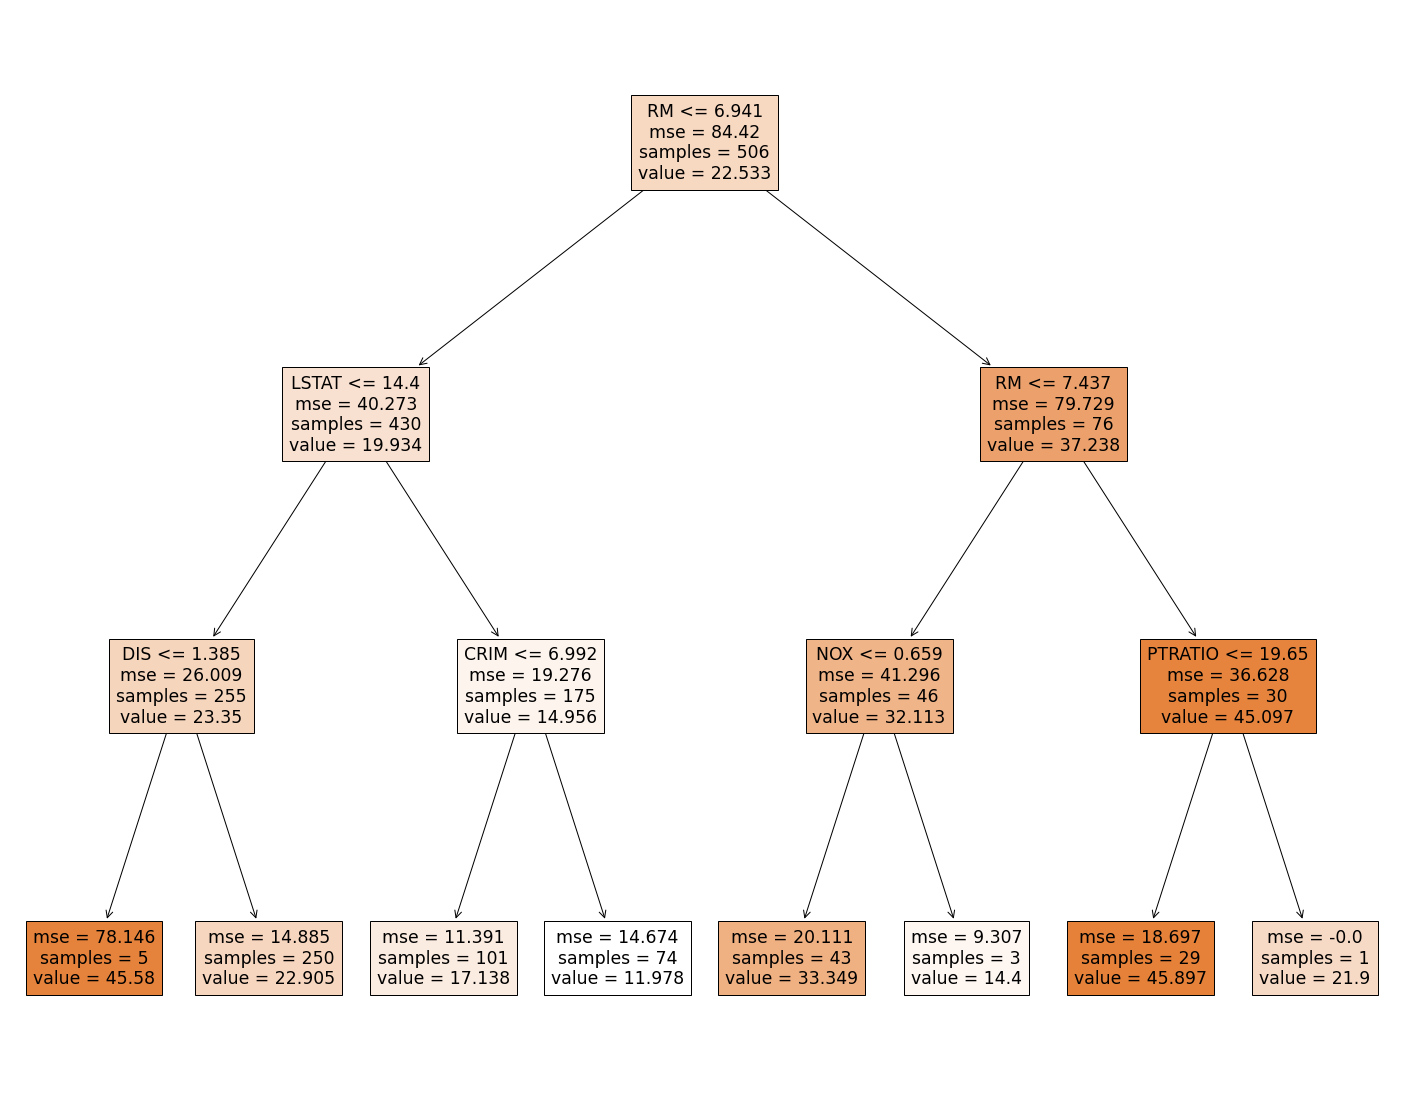

In [47]:
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(regr, feature_names=boston.feature_names, filled=True)

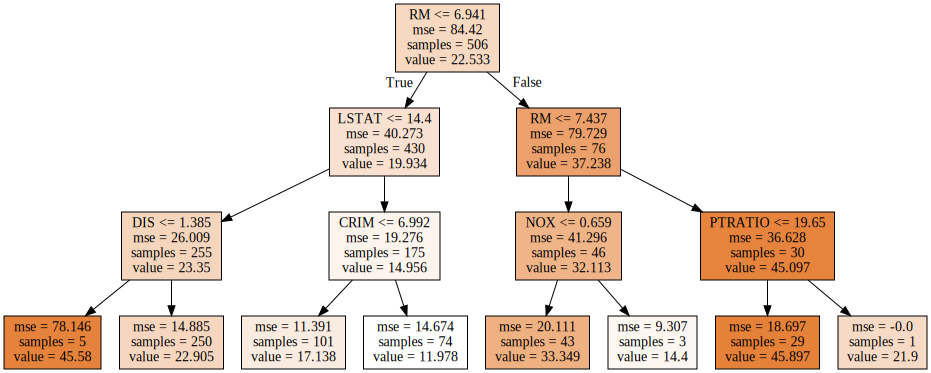

In [48]:
dot_data = tree.export_graphviz(regr, out_file=None, 
                                feature_names=boston.feature_names,  
                                filled=True)
graphviz.Source(dot_data, format="png")

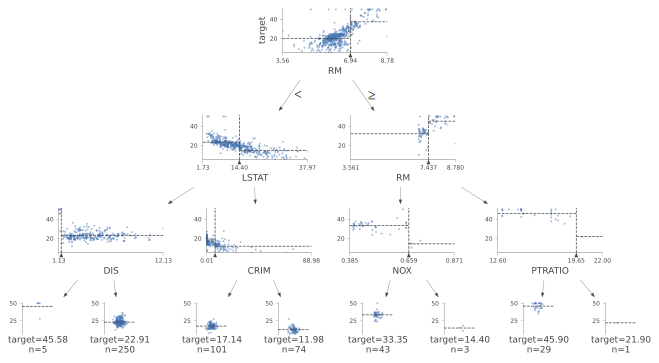

In [49]:
from dtreeviz.trees import dtreeviz # remember to load the package

viz = dtreeviz(regr, X, y,
                target_name="target",
                feature_names=boston.feature_names)
viz